2019-01-08 14:32:37.343645


C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\saipr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2019-01-08 14:32:52.201910


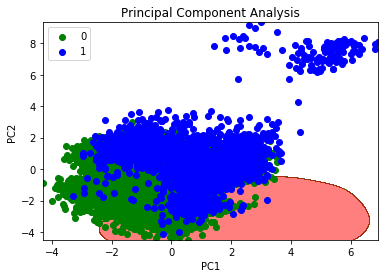

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

s = datetime.datetime.now()
print(s)

dataset = pd.read_csv('adult.csv')
df=dataset.copy()

df['native-country'].replace('?','United-States',inplace=True)
df['occupation'].replace('?','Prof-specialty',inplace=True)
df['workclass'].replace('?','Private',inplace=True)

x = df.iloc[:,:-1].values
y = df.iloc[:,14].values

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb_x = LabelEncoder()
x[:,1] = lb_x.fit_transform(x[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [1])

lb_x1 = LabelEncoder()
x[:,3] = lb_x1.fit_transform(x[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])

lb_x2 = LabelEncoder()
x[:,5] = lb_x2.fit_transform(x[:, 5])
onehotencoder = OneHotEncoder(categorical_features = [5])

lb_x3 = LabelEncoder()
x[:,6] = lb_x3.fit_transform(x[:, 6])
onehotencoder = OneHotEncoder(categorical_features = [6])

lb_x4 = LabelEncoder()
x[:,7] = lb_x4.fit_transform(x[:, 7])
onehotencoder = OneHotEncoder(categorical_features = [7])

lb_x5 = LabelEncoder()
x[:,8] = lb_x5.fit_transform(x[:, 8])
onehotencoder = OneHotEncoder(categorical_features = [8])

lb_x6 = LabelEncoder()
x[:,9] = lb_x6.fit_transform(x[:, 9])
onehotencoder = OneHotEncoder(categorical_features = [9])

lb_x7 = LabelEncoder()
x[:,13] = lb_x7.fit_transform(x[:, 13])
onehotencoder = OneHotEncoder(categorical_features = [13])

lb_y = LabelEncoder()
y = lb_y.fit_transform(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.5,random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


from sklearn.decomposition import PCA
pca = PCA(n_components =2)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components = 1)
# x_train = lda.fit_transform(x_train, y_train)
# x_test = lda.transform(x_test)



from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)

classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
s1 = datetime.datetime.now()
print(s1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
 
aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('white','green','blue','green','yellow','black','red')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(( 'green','blue'))(i), label = j)
# plt.title('Linear Discriminant Analysis')
plt.title('Principal Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.xlim(-6,6)
plt.legend()
plt.show()